<a href="https://colab.research.google.com/github/yujung1998/Machine-Learning/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.linear classifier

In [1]:
import pandas as pd
import numpy as np
# read csv
df_data = pd.read_csv('./data.csv')
df_crx = pd.read_csv('./crx.csv')
# print(len(df_data))

# data
data_x = df_data['6'].to_numpy()
data_y_init = df_data['Diagnosis']
data_y = []
for i in range(len(data_y_init)):
  if data_y_init[i] == 'M':
    data_y.append(1)
  else:
    data_y.append(-1)
# print(data_y)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.2, random_state = 487)

In [7]:
w, b = 0, 0
for i in range(len(train_x)):
  x, y = train_x[i], train_y[i]
  tmp = y * (w * x + b)
  if(tmp <= 0):
    w = w + y * x
    b = b + y
    # print(w,b)
print(f'f(x) = {w} * x + ({b})')

#
pred_y = []
for i in range(len(test_x)):
  tmp = w * test_x[i] + b
  if tmp > 0:
    pred_y.append(1)
  else:
    pred_y.append(-1)
# print(pred_y)

f(x) = 420.79999999999944 * x + (-80)


In [8]:
from sklearn.metrics import accuracy_score
print(f'{accuracy_score(test_y, pred_y)*100} %')

38.59649122807017 %


3.least-square method

In [9]:
from scipy.optimize import curve_fit

def func(train_data, w, b):
  result = w * train_data + b
  return result
train_x_1 = train_x.flatten()
alpha = curve_fit(func, xdata = train_x_1, ydata = train_y)[0]

w_1, b_1 = alpha[0], alpha[1]
print(f'f(x) = {w_1} * x + ({b_1})')

f(x) = 0.0019158612729008816 * x + (-1.511470356878459)


In [10]:
pred_y = []
for i in range(len(test_x)):
  tmp = w_1 * test_x[i] + b_1
  if tmp > 0:
    pred_y.append(1)
  else:
    pred_y.append(-1)

print(f'{accuracy_score(test_y, pred_y)*100} %')

86.8421052631579 %


4.Voted Perceptron Algorithm

In [13]:
from tqdm import tqdm
def vote_perceptron(train_x, train_y, epoch_num):
  w = b = 0
  time_alive = 1
  perceptrons = []
  for _ in (range(epoch_num)):
    for i in range(len(train_x)):
      x = train_x[i]
      y = train_y[i]
      if y * (w * x + b) <= 0:
        # w,b store
        perceptrons.append([w, b, time_alive])
        time_alive = 1
        w = w + y * x
        b = b + y
      else:
        time_alive += 1
    perceptrons.append([w, b, time_alive])
  # print(len(perceptrons))
  return perceptrons

def vp_predict(perceptrons, test_data):
  sum = 0
  for perceptron in (perceptrons):
    w, b, weight = perceptron[0], perceptron[1], perceptron[2]
    sum += weight * np.sign(w * test_data + b)
  return np.sign(sum)

In [14]:
perceptrons = vote_perceptron(train_x, train_y, 70)
pred_y = []
for i in tqdm(range(len(test_x))):
  pred_y.append(vp_predict(perceptrons, test_x[i]))

print(f'\n{accuracy_score(test_y, pred_y)*100} %')

100%|██████████| 114/114 [00:12<00:00,  8.99it/s]


38.59649122807017 %


7.SVM

In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score
clf = svm.SVC()
train_x = train_x.reshape(-1, 1)
clf.fit(train_x, train_y)

pred_y = clf.predict(test_x.reshape(-1, 1))
print(f'{accuracy_score(test_y, pred_y)*100} %')

90.35087719298247 %


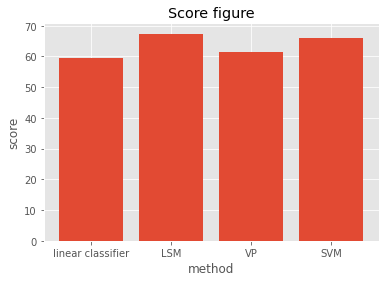

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

method = ['linear classifier', 'LSM', 'VP', 'SVM']
scores = [59.42, 67.39, 61.59, 65.94]
x = np.arange(len(method))
plt.bar(x, scores)
plt.xticks(x, method)
plt.xlabel('method')
plt.ylabel('score')
plt.title('Score figure')
plt.show()